In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup

In [3]:
!pip install geocoder
!pip install geopandas
!pip install geopy
import geocoder
import os
!pip install folium
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported successfully.')

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 102kB 1.0MB/s ta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 931kB 3.1MB/s eta 0:00:01     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 819kB 3.1MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14.7MB 26kB/s  eta 0:00:01.4MB 7.6MB/s eta 0:00:02     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                         | 3.0MB 7.6MB/s eta 0:00:02
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.8MB 19.5MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10.9MB 25kB/s  eta 0:00:01
You should consider upgrading via the 'pip inst

In [6]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [4]:
def get_business(lat,lng):
    
    #set variables
    radius=500
    LIMIT=50
    
    CLIENT_ID = 'Z0RFGKZ35UIYB5CK3L0JBBWR5SENDUF1Z02Q3H0DSPBWYETI'
    CLIENT_SECRET = 'KOHOM5YOVKO32ZNGIPXYG3X3UPAS3Z4V1A50Z0AEKMB4UE2D'
    VERSION = '20180605'
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    business_data=results["response"]['groups'][0]['items']
    business_details=[]
    for row in business_data:
        try:
            business_id=row['venue']['id']
            business_name=row['venue']['name']
            business_category=row['venue']['categories'][0]['name']
            business_details.append([business_id,business_name,business_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(business_details,columns=column_names)
    return df

In [5]:
def get_business_details(business_id):
    
    
    CLIENT_ID = '*****'
    CLIENT_SECRET = '*****'
    VERSION = '20180605'

    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            business_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    business_data=results['response']['venue']
    print(business_data)
    business_details=[]
    try:
        business_id=business_data['id']
        business_name=business_data['name']
        business_likes=business_data['likes']['count']
        business_rating=business_data['rating']
        business_tips=business_data['tips']['count']
        business_details.append([business_id,business_name,business_likes,business_rating,business_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(business_details,columns=column_names)
    return df

In [6]:
def get_ny_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    ny_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        ny_data = ny_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return ny_data

In [7]:
ny_data=get_ny_data()

In [8]:
ny_data.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [9]:
ny_data.shape

(306, 4)

In [10]:
ny_data.to_csv('ny_data_final.csv', index=False)

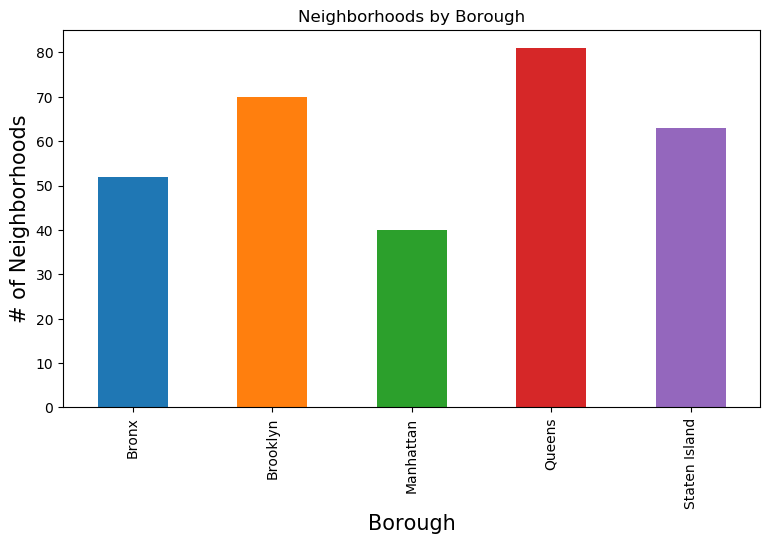

In [11]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Neighborhoods by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('# of Neighborhoods', fontsize=15)
#giving a bar plot
ny_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
#plt.legend()
#displays the plot
plt.show()

In [28]:
ny_data=pd.read_csv('ny_data_final.csv')

In [29]:
ny_data.shape

(306, 4)

In [43]:
# prepare neighborhood list that contains Italian restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
italian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_business(Latitude,Longitude)
    italian_restaurants=venues[venues['Category']=='Italian Restaurant']   
    print('(',count,'/',len(ny_data),')','Italian Restaurants in '+Neighborhood+', '+Borough+':'+str(len(italian_restaurants)))
    for restaurant_detail in italian_restaurants.values.tolist():
        id, name , category=restaurant_detail
        italian_rest_ny = italian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Italian Restaurants in Wakefield, Bronx:0
( 2 / 306 ) Italian Restaurants in Co-op City, Bronx:0
( 3 / 306 ) Italian Restaurants in Eastchester, Bronx:0
( 4 / 306 ) Italian Restaurants in Fieldston, Bronx:0
( 5 / 306 ) Italian Restaurants in Riverdale, Bronx:0
( 6 / 306 ) Italian Restaurants in Kingsbridge, Bronx:0
( 7 / 306 ) Italian Restaurants in Marble Hill, Manhattan:0
( 8 / 306 ) Italian Restaurants in Woodlawn, Bronx:1
( 9 / 306 ) Italian Restaurants in Norwood, Bronx:0
( 10 / 306 ) Italian Restaurants in Williamsbridge, Bronx:0
( 11 / 306 ) Italian Restaurants in Baychester, Bronx:0
( 12 / 306 ) Italian Restaurants in Pelham Parkway, Bronx:2
( 13 / 306 ) Italian Restaurants in City Island, Bronx:1
( 14 / 306 ) Italian Restaurants in Bedford Park, Bronx:0
( 15 / 306 ) Italian Restaurants in University Heights, Bronx:0
( 16 / 306 ) Italian Restaurants in Morris Heights, Bronx:0
( 17 / 306 ) Italian Restaurants in Fordham, Bronx:0
( 18 / 306 ) Italian Restaurants in Ea

In [ ]:
italian_rest_ny.to_csv('italianrestny_final2.csv', index=False)

In [45]:
italian_rest_ny.head()

Borough    Neighborhood                        ID                       Name
0   Bronx        Woodlawn  511edb6de4b0d58346fd272d     Patrizia's Of Woodlawn
1   Bronx  Pelham Parkway  4bf96ae65317a593d837017f                     Enzo's
2   Bronx  Pelham Parkway  4b47f069f964a5208c4426e3                Pasta Pasta
3   Bronx     City Island  4514ed4df964a520e5391fe3  Artie's Steak and Seafood
4   Bronx     Throgs Neck  4d4456d93616b60c953fe3c2              Tosca Marquee

In [4]:
italian_rest_ny_fromcsv_2=pd.read_csv('italianrestny_final2.csv')

In [5]:
italian_rest_ny_fromcsv_2.head()

Borough    Neighborhood                        ID                       Name
0   Bronx        Woodlawn  511edb6de4b0d58346fd272d     Patrizia's Of Woodlawn
1   Bronx  Pelham Parkway  4bf96ae65317a593d837017f                     Enzo's
2   Bronx  Pelham Parkway  4b47f069f964a5208c4426e3                Pasta Pasta
3   Bronx     City Island  4514ed4df964a520e5391fe3  Artie's Steak and Seafood
4   Bronx     Throgs Neck  4d4456d93616b60c953fe3c2              Tosca Marquee

In [6]:
italian_rest_ny_fromcsv_2.shape

(229, 4)

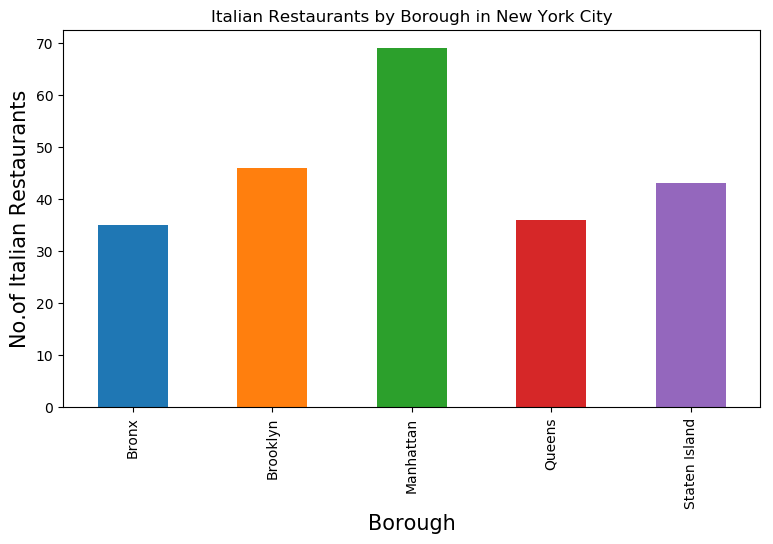

In [7]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Italian Restaurants by Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Italian Restaurants', fontsize=15)
#giving a bar plot
italian_rest_ny_fromcsv_2.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
#plt.legend()
#displays the plot
plt.show()

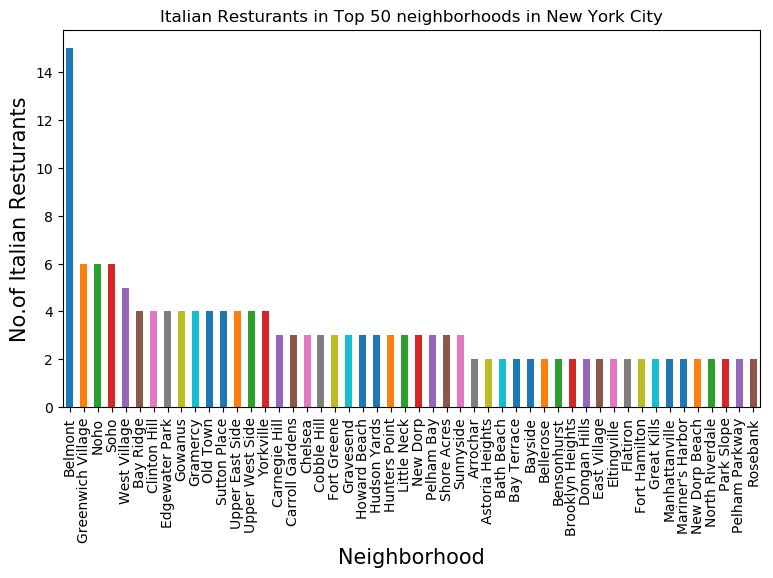

In [8]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Italian Resturants in Top 50 neighborhoods in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Italian Resturants', fontsize=15)
#giving a bar plot
italian_rest_ny_fromcsv_2.groupby('Neighborhood')['ID'].count().nlargest(50).plot(kind='bar')
#legend
#plt.legend()
#displays the plot
plt.show()

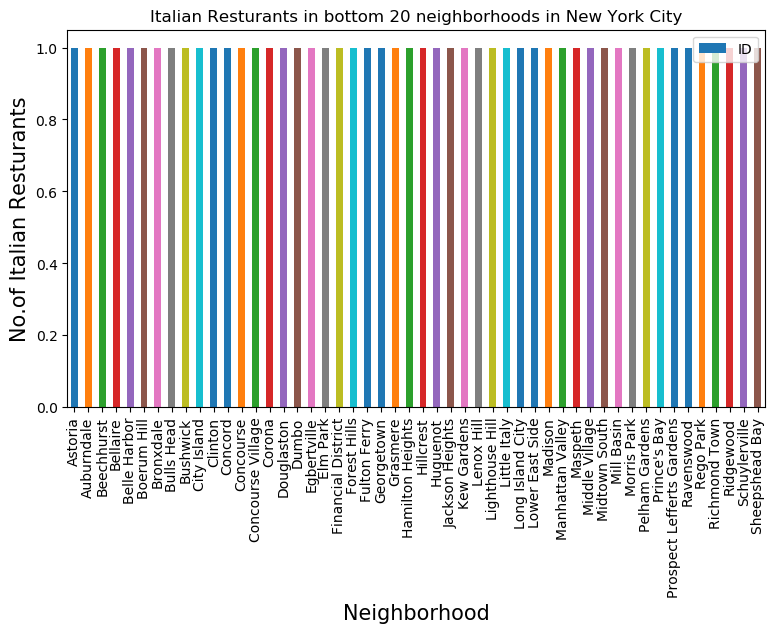

In [9]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Italian Resturants in bottom 20 neighborhoods in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Italian Resturants', fontsize=15)
#giving a bar plot
italian_rest_ny_fromcsv_2.groupby('Neighborhood')['ID'].count().nsmallest(50,keep='first').plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In the following steps, the 229 italian restaurants are split into 5 files to process 50 at a time with the Foursquare API premium calls. 
Then the output is comibined to create one CSV files for visualization.

In [13]:
#italian_rest_ny_fromcsv=pd.read_csv('italianrest_ny_1.csv')

In [16]:
#italian_rest_ny_fromcsv=pd.read_csv('italianrest_ny_2.csv')

In [28]:
#italian_rest_ny_fromcsv=pd.read_csv('italianrest_ny_3.csv')

In [39]:
#italian_rest_ny_fromcsv=pd.read_csv('italianrest_ny_4.csv')

In [50]:
italian_rest_ny_fromcsv=pd.read_csv('italianrest_ny_5.csv')

In [51]:
italian_rest_ny_fromcsv.head()

Borough     Neighborhood                        ID  \
0  Staten Island      Shore Acres  4b63728ff964a5208d7a2ae3   
1  Staten Island          Concord  4c07011e0e0a2d7ff9c7ec0c   
2  Staten Island         Elm Park  4d51deac3062a1cd37786ba3   
3       Brooklyn       Mill Basin  4c267153b012b71350e30893   
4         Queens  Astoria Heights  4f048814f9ab88b0c268dda3   

                                 Name  
0          Angie's Pizza & Restaurant  
1                             Venezia  
2  Bella Mama Rose Italian Restaurant  
3                  Landi's Pork Store  
4                   Antonio's Kitchen

In [52]:
italian_rest_ny_fromcsv.shape

(29, 4)

In [53]:
# Get the business details -Likes, Rating and Tips for each Italian Restaurant from the list.

#Due to the limits(50 per day) on the Premium API calls from Foursquare, italianrestny_final.csv was split into four parts and
# the following code is run four times to get details and merge all the data to create italianrest_stats_ny_final.csv.
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
italian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in italian_rest_ny_fromcsv.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        business_details=get_business_details(ID)
        #print(business_details)
        id,name,likes,rating,tips=business_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(italian_rest_ny_fromcsv),')','processed')
    italian_rest_stats_ny = italian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

{'id': '4b63728ff964a5208d7a2ae3', 'name': "Angie's Pizza & Restaurant", 'contact': {'phone': '7188167211', 'formattedPhone': '(718) 816-7211'}, 'location': {'address': '1377 Bay St', 'crossStreet': 'Evelyn Pl & Bay Street', 'lat': 40.610118, 'lng': -74.06298199999999, 'labeledLatLngs': [{'label': 'display', 'lat': 40.610118, 'lng': -74.06298199999999}, {'label': 'entrance', 'lat': 40.610102, 'lng': -74.063047}], 'postalCode': '10305', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1377 Bay St (Evelyn Pl & Bay Street)', 'Staten Island, NY 10305', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/angies-pizza--restaurant/4b63728ff964a5208d7a2ae3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1ca

In [54]:
italian_rest_stats_ny.shape

(29, 7)

In [55]:
#write output to a csv file.
italian_rest_stats_ny.to_csv('italianrest_stats_5.csv', index=False)

In [ ]:
# to verify that the data is written to the file.
datafromcsv = pd.read_csv('italianrest_stats_5.csv')

In [ ]:
datafromcsv.shape

In [58]:
datafromcsv.head()

Borough     Neighborhood                        ID  \
0  Staten Island      Shore Acres                         0   
1  Staten Island          Concord                         0   
2  Staten Island         Elm Park  4d51deac3062a1cd37786ba3   
3       Brooklyn       Mill Basin  4c267153b012b71350e30893   
4         Queens  Astoria Heights  4f048814f9ab88b0c268dda3   

                                 Name  Likes  Rating  Tips  
0                                   0      0     0.0     0  
1                                   0      0     0.0     0  
2  Bella Mama Rose Italian Restaurant      6     6.7    10  
3                  Landi's Pork Store     32     8.7    11  
4                   Antonio's Kitchen     15     7.1    12

Now, Merge the output of the all the stats files into one single csv file.

In [7]:
italianrest_stats_ny_final = pd.read_csv('italianrest_stats_ny_final2.csv')

In [8]:
italianrest_stats_ny_final.shape

(229, 7)

In [9]:
italianrest_stats_ny_final.head()

Borough    Neighborhood                        ID  \
0   Bronx        Woodlawn  511edb6de4b0d58346fd272d   
1   Bronx  Pelham Parkway  4bf96ae65317a593d837017f   
2   Bronx  Pelham Parkway  4b47f069f964a5208c4426e3   
3   Bronx     City Island  4514ed4df964a520e5391fe3   
4   Bronx     Throgs Neck  4d4456d93616b60c953fe3c2   

                        Name  Likes  Rating  Tips  
0     Patrizia's Of Woodlawn     18     8.3    14  
1                     Enzo's     26     8.7    11  
2                Pasta Pasta      9     6.4     8  
3  Artie's Steak and Seafood     44     8.3    27  
4              Tosca Marquee     19     6.9    14

Convert datatype for Likes and Tips From String to Float

In [10]:
italianrest_stats_ny_final['Likes']=italianrest_stats_ny_final['Likes'].astype('float64')
italianrest_stats_ny_final['Tips']=italianrest_stats_ny_final['Tips'].astype('float64')

Now we will find the Italian restuarants with Maximum Likes, Maximum Ratings and Maximum Tips.

In [11]:
italianrest_stats_ny_final.iloc[italianrest_stats_ny_final['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                        Soho
ID              4cc6222106c25481d7a4a047
Name                 Rubirosa Ristorante
Likes                               2491
Rating                               9.3
Tips                                 824
Name: 108, dtype: object

In [12]:
italianrest_stats_ny_final.iloc[italianrest_stats_ny_final['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood                    Bushwick
ID              5a98aed16a59506d7a60d67c
Name                        Carmenta‚Äö√Ñ√¥s
Likes                                 56
Rating                               9.5
Tips                                  21
Name: 46, dtype: object

In [13]:
italianrest_stats_ny_final.iloc[italianrest_stats_ny_final['Tips'].idxmax()]

Borough                    Staten Island
Neighborhood               West Brighton
ID              4b5b58dbf964a52088f628e3
Name                        Panini Grill
Likes                                 21
Rating                               8.6
Tips                                1136
Name: 157, dtype: object

Visualize neighborhood with maximum average rating.

In [14]:
ny_neighborhood_stats=italianrest_stats_ny_final.groupby(['Neighborhood'],as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [15]:
ny_neighborhood_stats.shape

(114, 2)

In [16]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(25)

Neighborhood  Average Rating
18             Bushwick        9.500000
14          Boerum Hill        9.100000
51     Hamilton Heights        9.000000
101             Tribeca        8.900000
50    Greenwich Village        8.866667
93                 Soho        8.866667
110     Windsor Terrace        8.800000
15            Bronxdale        8.800000
24         Clinton Hill        8.750000
44           Georgetown        8.700000
29               Corona        8.700000
61         Little Italy        8.700000
72           Mill Basin        8.700000
76                 Noho        8.650000
16     Brooklyn Heights        8.650000
73          Morris Park        8.600000
57      Jackson Heights        8.600000
9              Bellaire        8.600000
108        West Village        8.520000
39             Flatiron        8.500000
81       Pelham Gardens        8.500000
106  Washington Heights        8.500000
64      Lower East Side        8.500000
71        Midtown South        8.500000
86            Rego Park        8.500000

Similarly we will find the average rating of Italian Resturants for each Borough.

In [17]:
ny_borough_stats=italianrest_stats_ny_final.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [18]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

Borough  Average Rating
2      Manhattan        8.476812
0          Bronx        7.828571
1       Brooklyn        7.804348
3         Queens        7.041667
4  Staten Island        5.176744

Visualize the data

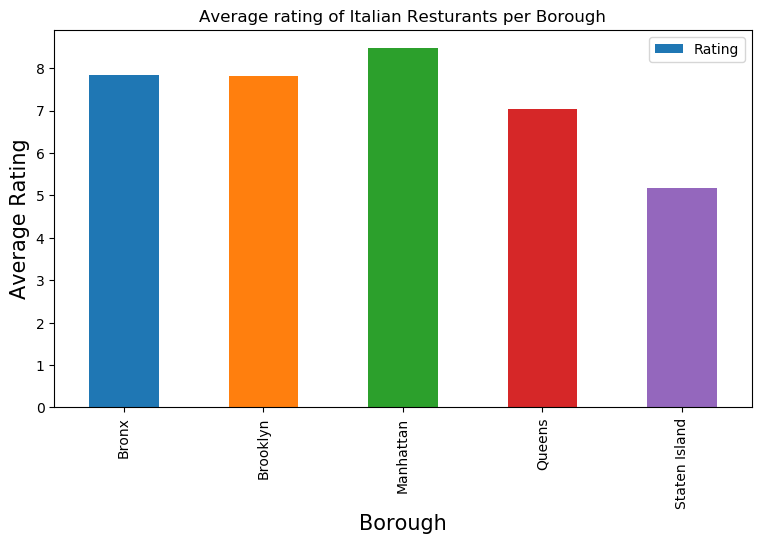

In [19]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Italian Resturants per Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
italianrest_stats_ny_final.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Let us consider all the neighborhoods with average rating greater or equal 8.5

In [20]:
ny_neighborhood_stats.shape

(114, 2)

In [21]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.5]

In [22]:
ny_neighborhood_stats.shape

(26, 2)

In [23]:
ny_neighborhood_stats.head()

Neighborhood  Average Rating
9           Bellaire            8.60
14       Boerum Hill            9.10
15         Bronxdale            8.80
16  Brooklyn Heights            8.65
18          Bushwick            9.50

In [24]:
print(ny_neighborhood_stats)

                  Neighborhood  Average Rating
9                     Bellaire        8.600000
14                 Boerum Hill        9.100000
15                   Bronxdale        8.800000
16            Brooklyn Heights        8.650000
18                    Bushwick        9.500000
24                Clinton Hill        8.750000
29                      Corona        8.700000
39                    Flatiron        8.500000
44                  Georgetown        8.700000
50           Greenwich Village        8.866667
51            Hamilton Heights        9.000000
57             Jackson Heights        8.600000
61                Little Italy        8.700000
64             Lower East Side        8.500000
71               Midtown South        8.500000
72                  Mill Basin        8.700000
73                 Morris Park        8.600000
76                        Noho        8.650000
81              Pelham Gardens        8.500000
84   Prospect Lefferts Gardens        8.500000
86           

Visualize Ratings by Neighborhood.


In [25]:
ny_toprating_stats = ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.5]

In [26]:
ny_toprating_stats.shape

(26, 2)

In [30]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')

In [31]:

ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [44]:
ny_neighborhood_stats

Borough               Neighborhood   Latitude  Longitude  \
0          Queens                   Bellaire  40.733014 -73.738892   
1        Brooklyn                Boerum Hill  40.685683 -73.983748   
2        Brooklyn           Brooklyn Heights  40.695864 -73.993782   
3        Brooklyn                   Bushwick  40.698116 -73.925258   
4       Manhattan                    Chelsea  40.744035 -74.003116   
5   Staten Island                    Chelsea  40.594726 -74.189560   
6        Brooklyn               Clinton Hill  40.693229 -73.967843   
7          Queens                     Corona  40.742382 -73.856825   
8        Brooklyn                 Georgetown  40.623845 -73.916075   
9       Manhattan          Greenwich Village  40.726933 -73.999914   
10      Manhattan           Hamilton Heights  40.823604 -73.949688   
11         Queens            Jackson Heights  40.751981 -73.882821   
12      Manhattan               Little Italy  40.719324 -73.997305   
13      Manhattan            Lower East Side  40.717807 -73.980890   
14          Bronx                Morris Park  40.847549 -73.850402   
15          Bronx             Pelham Gardens  40.862966 -73.841612   
16       Brooklyn  Prospect Lefferts Gardens  40.658420 -73.954899   
17         Queens                  Rego Park  40.728974 -73.857827   
18      Manhattan                       Soho  40.722184 -74.000657   
19      Manhattan                    Tribeca  40.721522 -74.010683   
20      Manhattan            Upper West Side  40.787658 -73.977059   
21      Manhattan         Washington Heights  40.851903 -73.936900   
22       Brooklyn            Windsor Terrace  40.656946 -73.980073   

    Average Rating  
0         8.600000  
1         9.100000  
2         8.650000  
3         9.500000  
4         8.600000  
5         8.600000  
6         8.750000  
7         8.700000  
8         8.700000  
9         9.100000  
10        9.000000  
11        8.600000  
12        9.000000  
13        8.500000  
14        8.600000  
15        8.500000  
16        8.500000  
17        8.500000  
18        8.866667  
19        8.900000  
20        8.500000  
21        8.500000  
22        8.800000

In [32]:
ny_neighborhood_stats.to_csv('ny_neighborhood_stats_final2.csv')

In [33]:
#Read data from the csv file.
ny_neighborhood_stats=pd.read_csv('ny_neighborhood_stats_final2.csv')

In [34]:
ny_neighborhood_stats.shape

(26, 6)

In [38]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [40]:
# instantiate a feature group 
incidents = folium.FeatureGroup(name="My Map")

# loop through the neighborhood and each location to the feature group and then add the feature group to the map.
for lat, lng, neighborhood, borough, avgrating in ny_neighborhood_stats[['Latitude','Longitude','Borough','Neighborhood','Average Rating']].values:
    incidents.add_child(folium.CircleMarker(location=[lat, lng], radius = 100,color='blue', popup=neighborhood+' '+borough +'  ' + str(avgrating)))

ny_map.add_child(incidents)

In [37]:
ny_map.save('neighborhood_2.html')

In [75]:
ny_neighborhood_stats

Borough               Neighborhood   Latitude  Longitude  \
0          Queens                   Bellaire  40.733014 -73.738892   
1        Brooklyn                Boerum Hill  40.685683 -73.983748   
2        Brooklyn           Brooklyn Heights  40.695864 -73.993782   
3        Brooklyn                   Bushwick  40.698116 -73.925258   
4       Manhattan                    Chelsea  40.744035 -74.003116   
5   Staten Island                    Chelsea  40.594726 -74.189560   
6        Brooklyn               Clinton Hill  40.693229 -73.967843   
7          Queens                     Corona  40.742382 -73.856825   
8        Brooklyn                 Georgetown  40.623845 -73.916075   
9       Manhattan          Greenwich Village  40.726933 -73.999914   
10      Manhattan           Hamilton Heights  40.823604 -73.949688   
11         Queens            Jackson Heights  40.751981 -73.882821   
12      Manhattan               Little Italy  40.719324 -73.997305   
13      Manhattan            Lower East Side  40.717807 -73.980890   
14          Bronx                Morris Park  40.847549 -73.850402   
15          Bronx             Pelham Gardens  40.862966 -73.841612   
16       Brooklyn  Prospect Lefferts Gardens  40.658420 -73.954899   
17         Queens                  Rego Park  40.728974 -73.857827   
18      Manhattan                       Soho  40.722184 -74.000657   
19      Manhattan                    Tribeca  40.721522 -74.010683   
20      Manhattan            Upper West Side  40.787658 -73.977059   
21      Manhattan         Washington Heights  40.851903 -73.936900   
22       Brooklyn            Windsor Terrace  40.656946 -73.980073   

    Average Rating  
0         8.600000  
1         9.100000  
2         8.650000  
3         9.500000  
4         8.600000  
5         8.600000  
6         8.750000  
7         8.700000  
8         8.700000  
9         9.100000  
10        9.000000  
11        8.600000  
12        9.000000  
13        8.500000  
14        8.600000  
15        8.500000  
16        8.500000  
17        8.500000  
18        8.866667  
19        8.900000  
20        8.500000  
21        8.500000  
22        8.800000